In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.tseries.offsets import Nano

In [2]:
experiment = 'experiment7'

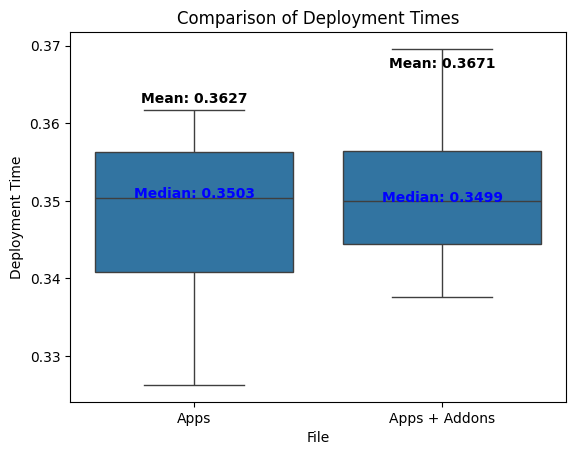

In [3]:
df1 = pd.read_csv(f"results/{experiment}/deployment.test1.csv")
df2 = pd.read_csv(f"results/{experiment}/deployment.test2.csv")

df1['File'] = 'Apps'
df2['File'] = 'Apps + Addons'

concat_df = pd.concat([df1, df2])

box_plot = sns.boxplot(data=concat_df, x='File', y='deployment_time', showfliers=False)

means = concat_df.groupby('File')['deployment_time'].mean()
medians = concat_df.groupby('File')['deployment_time'].median()

for i in range(len(means)):
    box_plot.text(i, means[i], f'Mean: {means[i]:.4f}', horizontalalignment='center', color='black', weight='semibold')
    box_plot.text(i, medians[i], f'Median: {medians[i]:.4f}', horizontalalignment='center', color='blue', weight='semibold')

plt.xlabel('File')
plt.ylabel('Deployment Time')
plt.title('Comparison of Deployment Times')

plt.show()

In [7]:
def create_line_graph(df, metric):
    fig, ax1 = plt.subplots(figsize=(10, 6))
    line_plot = sns.lineplot(data=df, x='timestamp', y=metric, hue='File', ax=ax1)

    # Set labels and title
    ax1.set_xlabel('Time')
    ax1.set_ylabel(metric)
    ax1.set_title(f'Comparison of {metric} over time')

    # Create a second x-axis
    ax2 = ax1.twiny()
    ax2.set_xlabel('Services Deployed')
    ax2.set_xlim(0, 63)

    # Show the plot
    plt.show()
    
df1 = pd.read_csv(f"results/{experiment}/cpumem.test1.csv")
df3 = pd.read_csv(f"results/{experiment}/cpumem.test1a.csv")

df2 = pd.read_csv(f"results/{experiment}/cpumem.test2.csv")
df4 = pd.read_csv(f"results/{experiment}/cpumem.test2a.csv")

df1['File'] = 'Apps'
df3['File'] = 'System idle'

df2['File'] = 'Apps + Addons'
df4['File'] = 'Addons only'

# Convert columns to numeric
for column in ['%CPU', 'MEM']:
    df1[column] = df1[column].astype(str).str.rstrip('%').astype('float')
    df3[column] = df3[column].astype(str).str.rstrip('%').astype('float')

    df2[column] = df2[column].astype(str).str.rstrip('%').astype('float')
    df4[column] = df4[column].astype(str).str.rstrip('%').astype('float')

# Normalize time
df1['timestamp'] = df1['timestamp'] - df1['timestamp'].min()
df3['timestamp'] = df3['timestamp'] - df3['timestamp'].min()

df2['timestamp'] = df2['timestamp'] - df2['timestamp'].min()
df4['timestamp'] = df4['timestamp'] - df4['timestamp'].min()

# Moving average
window_size = 3
df1['%CPU'] = df1['%CPU'].rolling(window=window_size).mean()
df3['%CPU'] = df3['%CPU'].rolling(window=window_size).mean()

df2['%CPU'] = df2['%CPU'].rolling(window=window_size).mean()
df4['%CPU'] = df4['%CPU'].rolling(window=window_size).mean()

df1['%MEM'] = df1['MEM'].rolling(window=window_size).mean()
df3['%MEM'] = df3['MEM'].rolling(window=window_size).mean()

df2['%MEM'] = df2['MEM'].rolling(window=window_size).mean()
df4['%MEM'] = df4['MEM'].rolling(window=window_size).mean()


concat_df = pd.concat([df1, df3, df2, df4])
concat_df.reset_index(inplace=True)
    

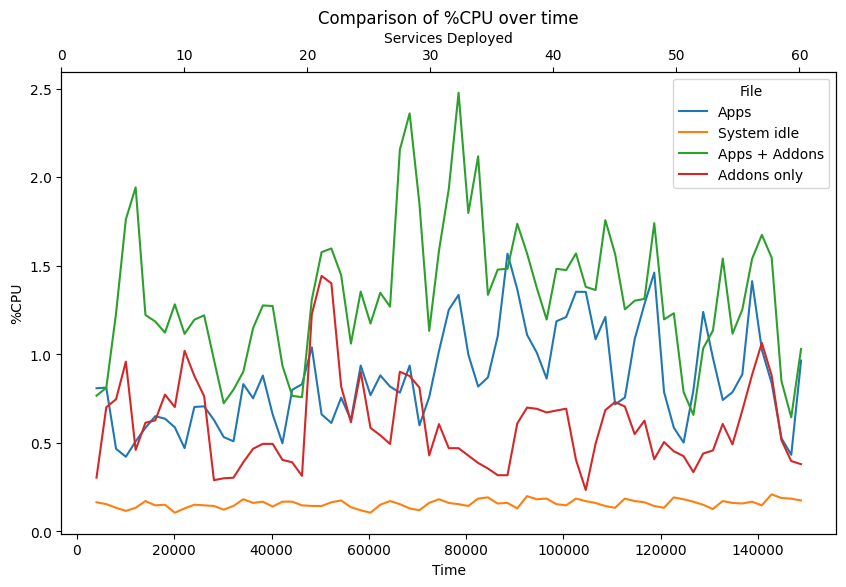

In [5]:
create_line_graph(concat_df, '%CPU')

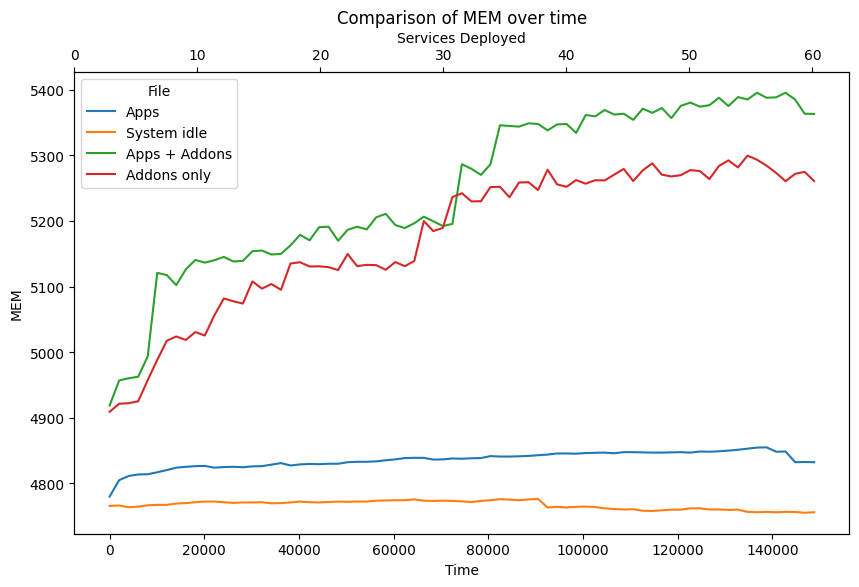

In [8]:
create_line_graph(concat_df, 'MEM')